In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Electricity Consumption.csv')
df.head(5)

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


## Data cleaning

### Rename columns for better readability

In [4]:
df.rename(columns ={'DATE':'date','Electricty_Consumption_in_TW':'electricty_consumption'},inplace = True)

In [5]:
df.head(5)

,date,electricty_consumption
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


### convert object to datetime datetype 

In [6]:
df['date']=pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    561 non-null    datetime64[ns]
 1   electricty_consumption  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


### missing values

In [8]:
df.isnull().sum()

date                      0
electricty_consumption    0
dtype: int64

### outlier analysis

In [9]:
df.describe()

,date,electricty_consumption
count,561,561.000000
mean,1996-05-01 10:08:20.534759296,76.681764
min,1973-01-01 00:00:00,33.510700
25%,1984-09-01 00:00:00,55.919700
50%,1996-05-01 00:00:00,78.417000
75%,2008-01-01 00:00:00,93.840600
max,2019-09-01 00:00:00,123.216300
std,NaN,22.756474


<Axes: >

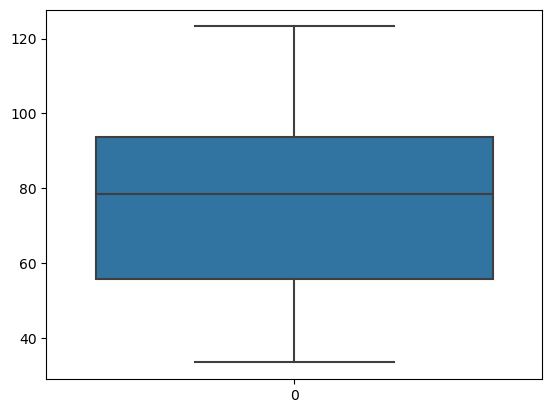

In [10]:
sns.boxplot(data = df['electricty_consumption'])

### duplicates

In [11]:
df.duplicated().sum()

0

In [12]:
# No outliers, no missing values and no duplicate values are found

## Exploratory data analysis

In [13]:
df.set_index('date',inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   electricty_consumption  561 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


In [15]:
df.index.max()

Timestamp('2019-09-01 00:00:00')

In [16]:
df.index.min()

Timestamp('1973-01-01 00:00:00')

In [17]:
import warnings
warnings.filterwarnings("ignore")

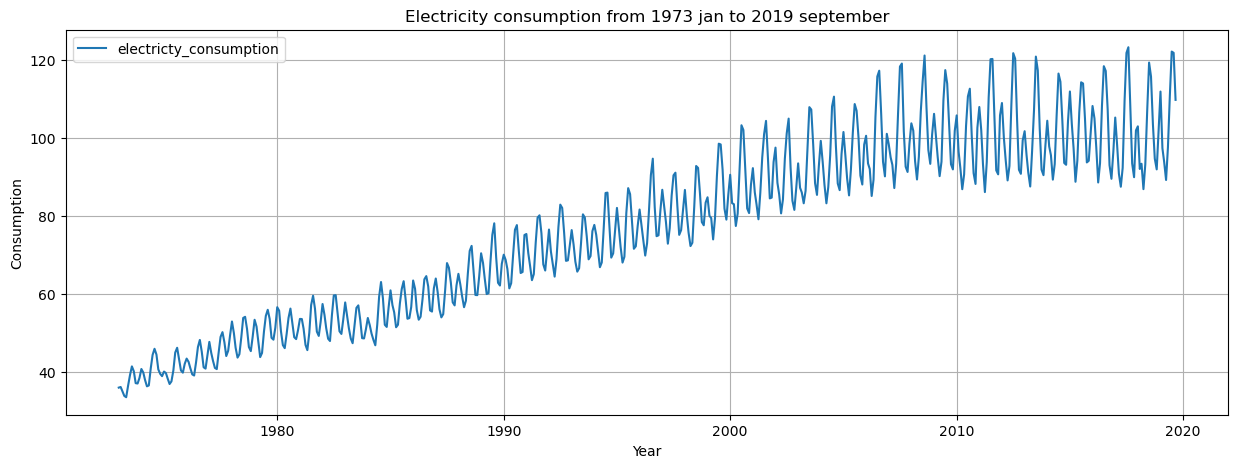

In [18]:
plt.figure(figsize=(15, 5))
sns.lineplot(df,c= 'green')
plt.title('Electricity consumption from 1973 jan to 2019 september')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.grid()
plt.show()

In [19]:
df['month']=df.index.strftime('%b')

In [20]:
df['year'] = df.index.year

In [21]:
df

,electricty_consumption,month,year
date,,,
1973-01-01,35.9728,Jan,1973
1973-02-01,36.1334,Feb,1973
1973-03-01,35.0625,Mar,1973
1973-04-01,33.8416,Apr,1973
1973-05-01,33.5107,May,1973
...,...,...,...
2019-05-01,97.5860,May,2019
2019-06-01,110.8580,Jun,2019
2019-07-01,122.1014,Jul,2019


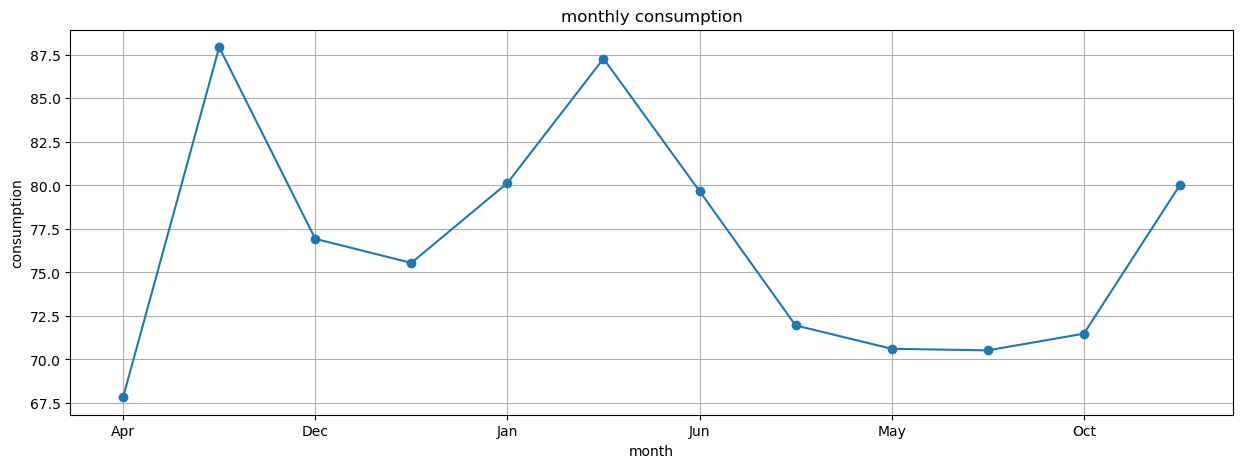

In [22]:
plt.figure(figsize = (15,5))
df.groupby('month').mean()['electricty_consumption'].plot(marker ='o')
plt.title('monthly consumption')
plt.xlabel('month')
plt.ylabel('consumption')
plt.grid()
plt.show()

### Decomposition of time series to check the trend,seasonality and residuals

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['electricty_consumption'],model ='additive')
result

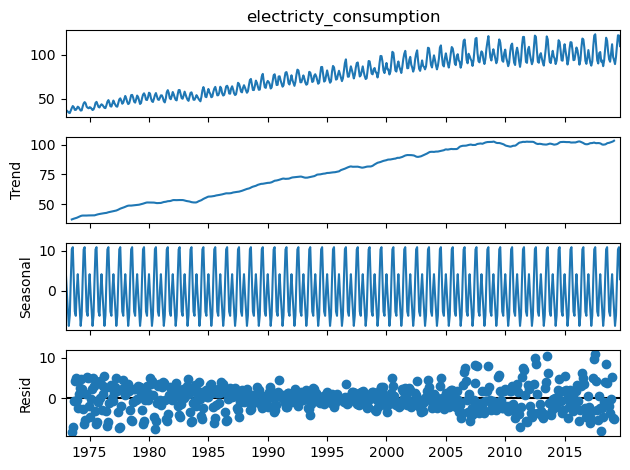

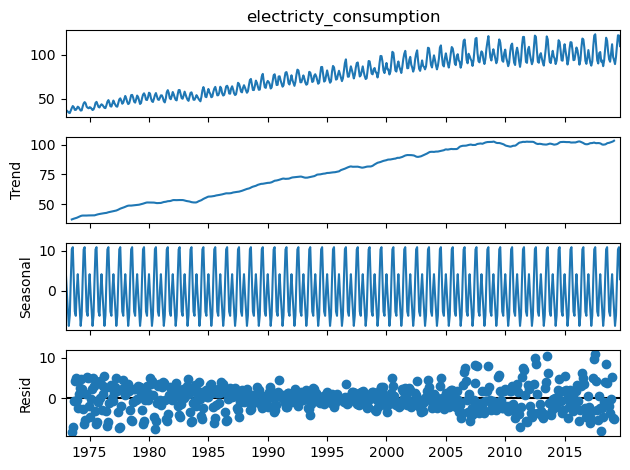

In [24]:
result.plot()

## stationarity test

In [25]:
# As we can see from the above decomposition we have clearly have a trend thus it says its non stationary data 
# where mean and variance keep changing

#### ADfuller test

In [26]:
# H0: Data is not sttaionary
# H1: Data is stationary
# decision: if p value is less than 0.05 reject null hypothesis
# if p value is greater than 0.05 fail to reject the null hypothesis

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
adfuller(df['electricty_consumption'])

(-1.7405933729832488,
 0.4103281604468657,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

#### As p value(0.4) ie.,40% is greater than significance value (5%) we fail to reject the null hypothesis. Thus the data we have is non stationary

### Non stationary to stationary

In [29]:
adfuller(df['electricty_consumption'].diff().dropna())

(-7.941665363981186,
 3.3013438021514486e-12,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2292.555416618966)

In [30]:
#p value is much much lesser than the significance level(0.05) thus we are rejecting the null hypothesis amd 
#accepting alternative hypothesis which is the data is stationary

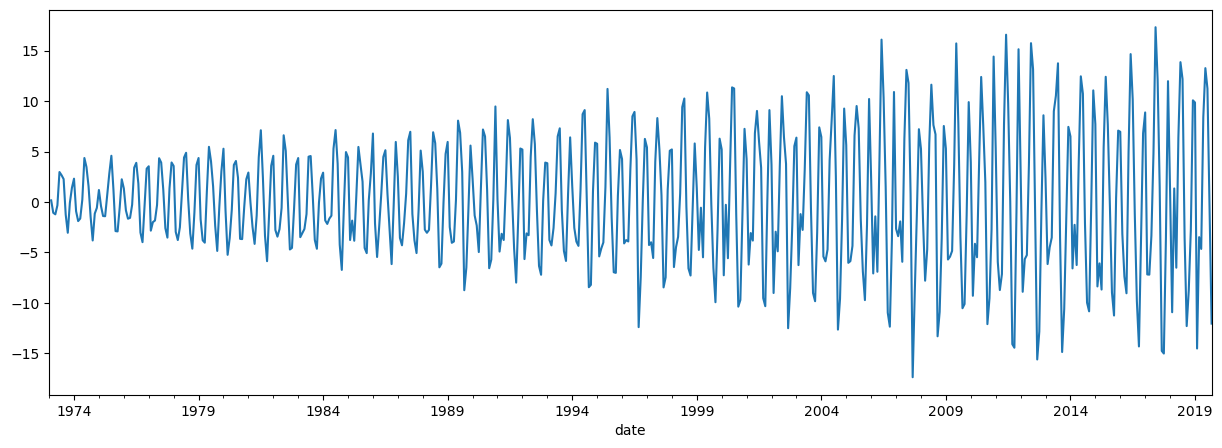

In [31]:
#data has become stationary by differencing once
plt.figure(figsize=(15,5))
df['electricty_consumption'].diff().plot()
plt.show()

### ACF plots, PACF plots

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 1500x500 with 0 Axes>

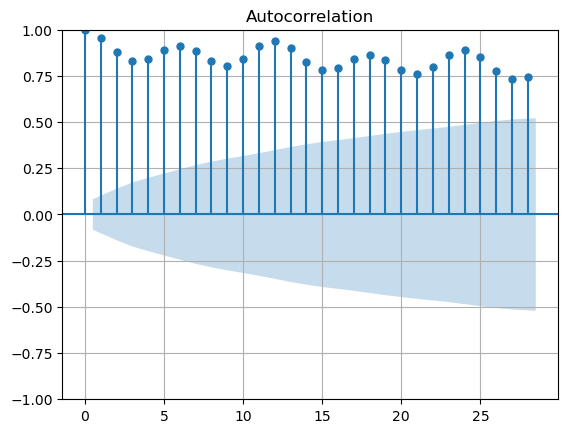

In [33]:
plt.figure(figsize=(15,5))
plot_acf(df['electricty_consumption'])
plt.grid()
plt.show()

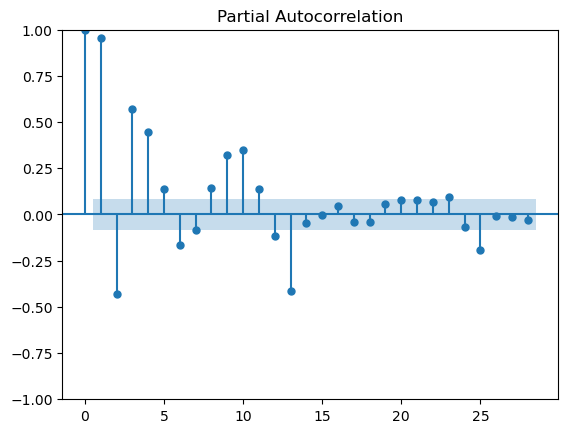

In [34]:
plot_pacf(df['electricty_consumption'])
plt.show()

### Arima model

In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [36]:
split_date = '2017-01-01'
train = df[df.index < split_date]
train= train.iloc[:,:1]
test = df[df.index >= split_date]
test = test.iloc[:,:1]
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (528, 1)
Testing set shape: (33, 1)


In [37]:
train

,electricty_consumption
date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2016-08-01,117.1375
2016-09-01,107.3046
2016-10-01,92.9818


In [38]:
test

,electricty_consumption
date,
2017-01-01,105.1879
2017-02-01,98.0069
2017-03-01,90.8029
2017-04-01,87.4594
2017-05-01,92.2811
2017-06-01,109.6104
2017-07-01,121.7478
2017-08-01,123.2163
2017-09-01,108.4514


In [39]:
model = ARIMA(endog = train,order = (4,1,5))
arima_model = model.fit()

C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
forecast = arima_model.forecast(steps=len(test))
forecast.head()

2017-01-01    106.001218
2017-02-01    106.225708
2017-03-01     97.241137
2017-04-01     89.464084
2017-05-01     92.741717
Freq: MS, Name: predicted_mean, dtype: float64

In [41]:
test.head(5)

,electricty_consumption
date,
2017-01-01,105.1879
2017-02-01,98.0069
2017-03-01,90.8029
2017-04-01,87.4594
2017-05-01,92.2811


In [42]:
test

,electricty_consumption
date,
2017-01-01,105.1879
2017-02-01,98.0069
2017-03-01,90.8029
2017-04-01,87.4594
2017-05-01,92.2811
2017-06-01,109.6104
2017-07-01,121.7478
2017-08-01,123.2163
2017-09-01,108.4514


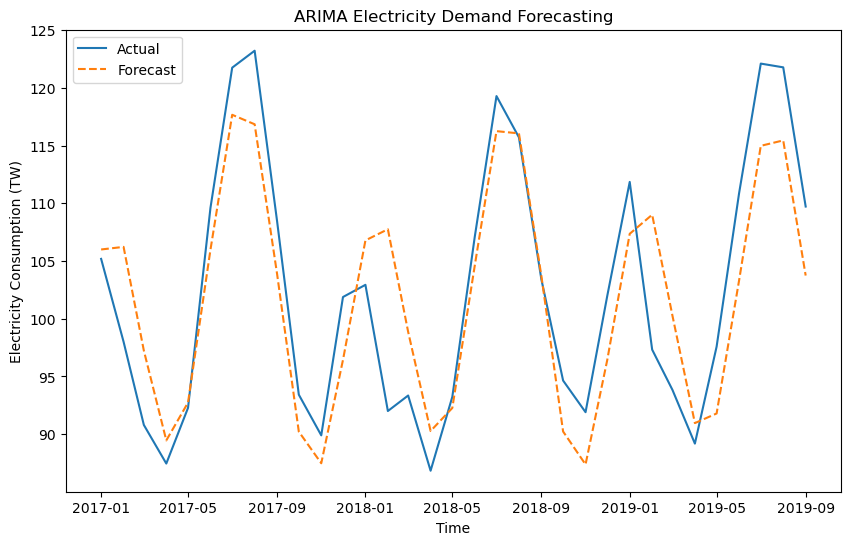

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['electricty_consumption'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('ARIMA Electricity Demand Forecasting')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption (TW)')
plt.show()

In [44]:
mean_squared_error(forecast,test)

32.16901869633789

In [45]:
model = ARIMA(endog = df.iloc[:,:1],order = (4,1,5))
arima_model = model.fit()

preds = arima_model.predict()

C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


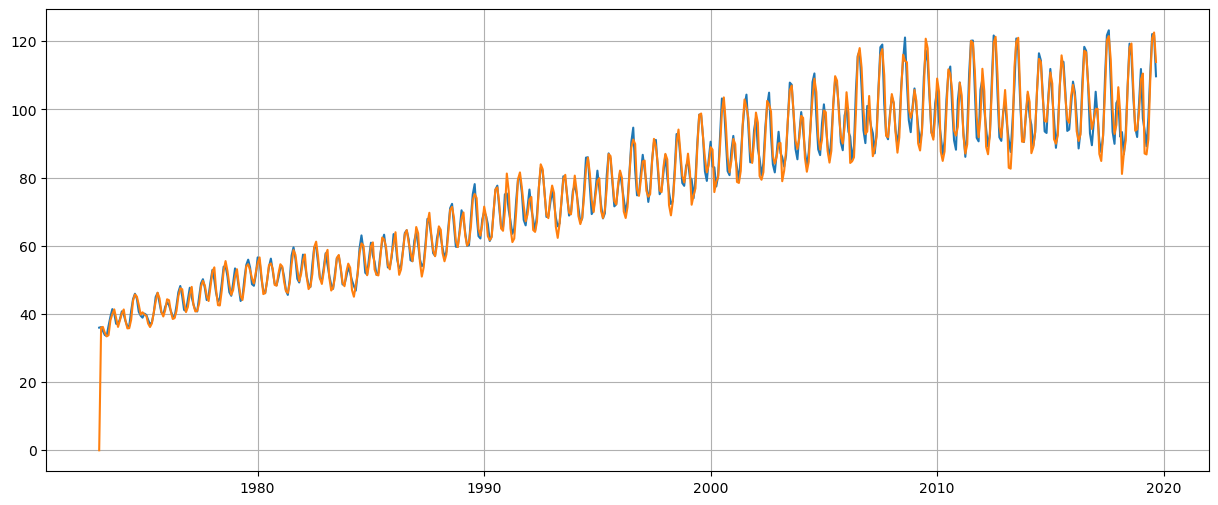

In [46]:
plt.figure(figsize = (15,6))
plt.plot(df.iloc[:,:1],label = 'actual')
plt.plot(df.index,preds,label = 'predicted')
plt.grid()
plt.show()

<Axes: >

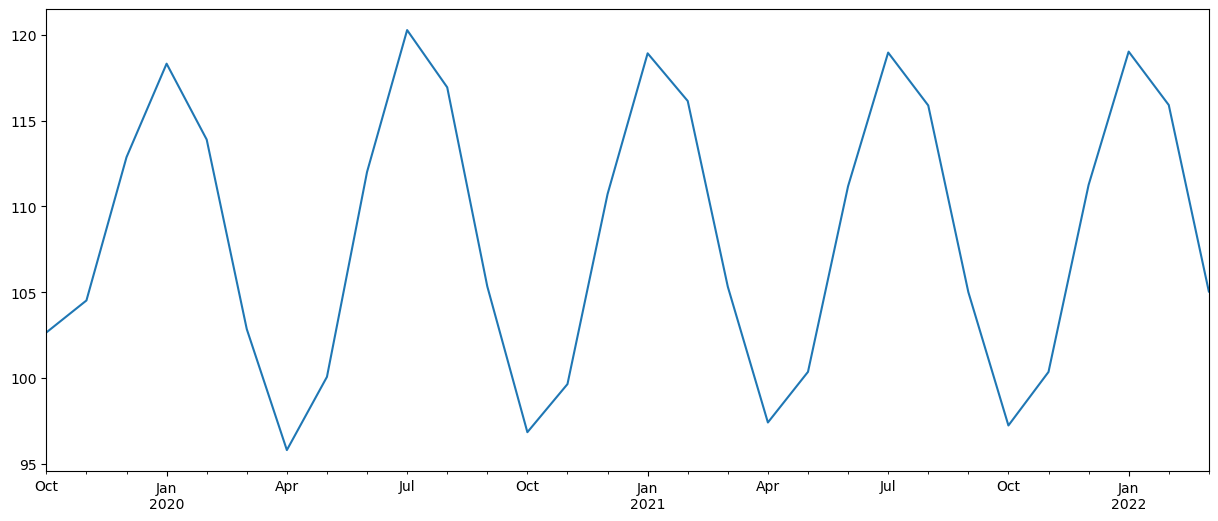

In [47]:
forecast = arima_model.forecast(steps =30 )
plt.figure(figsize = (15,6))
forecast.plot()

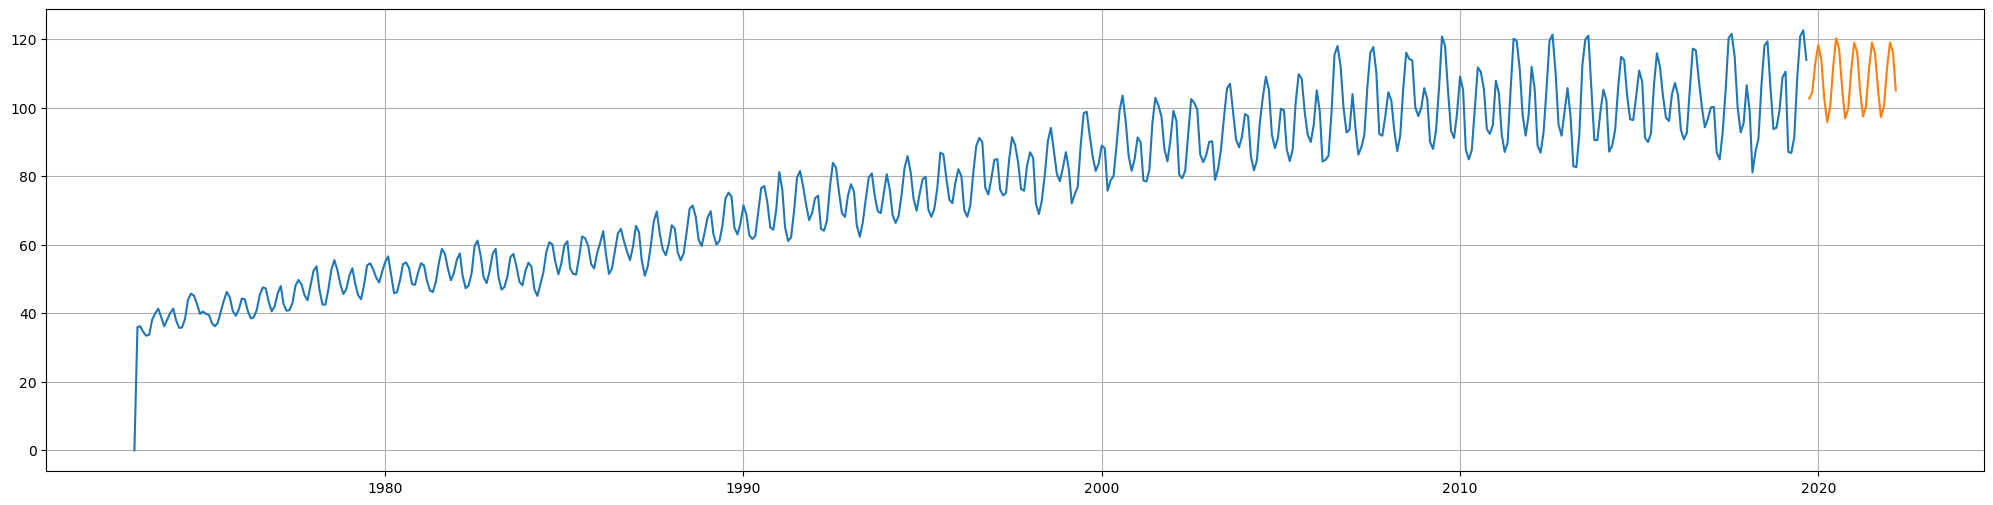

In [48]:
plt.figure(figsize = (25,6))
plt.plot(preds,label = "Data given from 1973 to 2019")
plt.plot(forecast,label = "forecasted future consumption for 2020 to 22")
plt.grid()
plt.show()

### ETS model

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [50]:
df = df.iloc[:,:1]
df

,electricty_consumption
date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


In [51]:
ets_model = ExponentialSmoothing(df, seasonal='additive', seasonal_periods=12).fit()


C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
forecast = ets_model.forecast(steps = 30)
forecast

2019-10-01     97.515248
2019-11-01     94.846963
2019-12-01    104.929661
2020-01-01    111.615584
2020-02-01    101.327797
2020-03-01     98.873766
2020-04-01     93.040920
2020-05-01     99.075025
2020-06-01    112.487512
2020-07-01    123.465510
2020-08-01    122.021606
2020-09-01    109.272099
2020-10-01     97.515248
2020-11-01     94.846963
2020-12-01    104.929661
2021-01-01    111.615584
2021-02-01    101.327797
2021-03-01     98.873766
2021-04-01     93.040920
2021-05-01     99.075025
2021-06-01    112.487512
2021-07-01    123.465510
2021-08-01    122.021606
2021-09-01    109.272099
2021-10-01     97.515248
2021-11-01     94.846963
2021-12-01    104.929661
2022-01-01    111.615584
2022-02-01    101.327797
2022-03-01     98.873766
Freq: MS, dtype: float64

<Axes: >

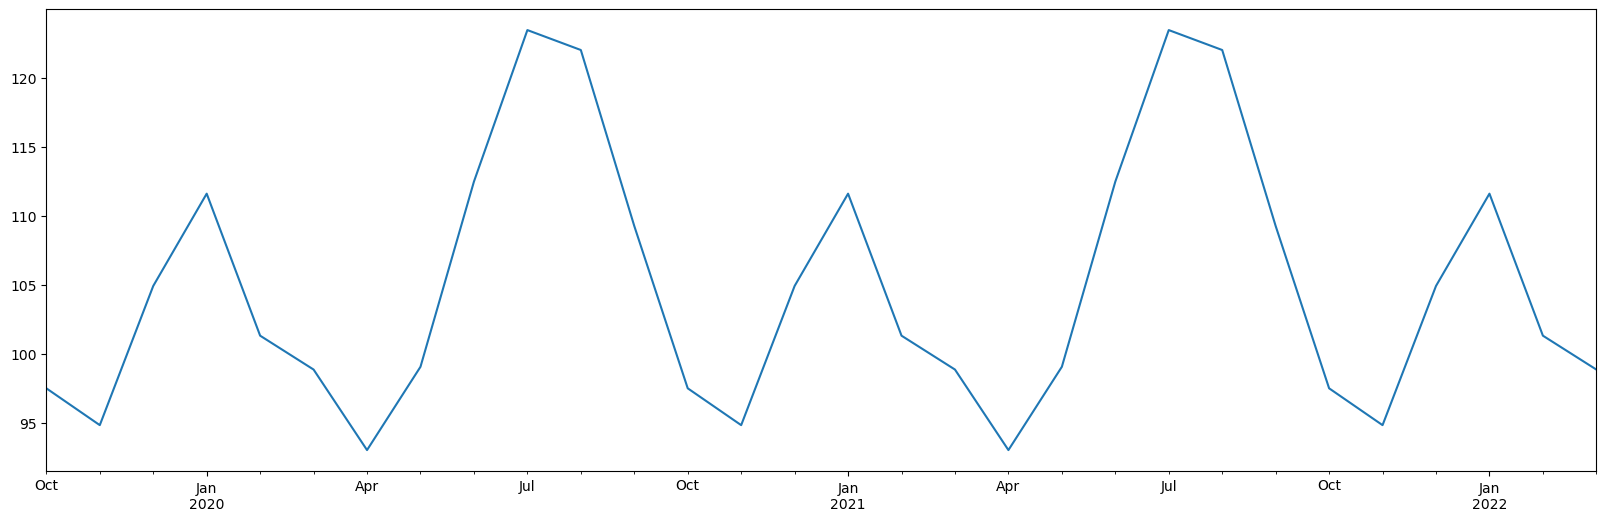

In [53]:
plt.figure(figsize = (20,6))
forecast.plot()

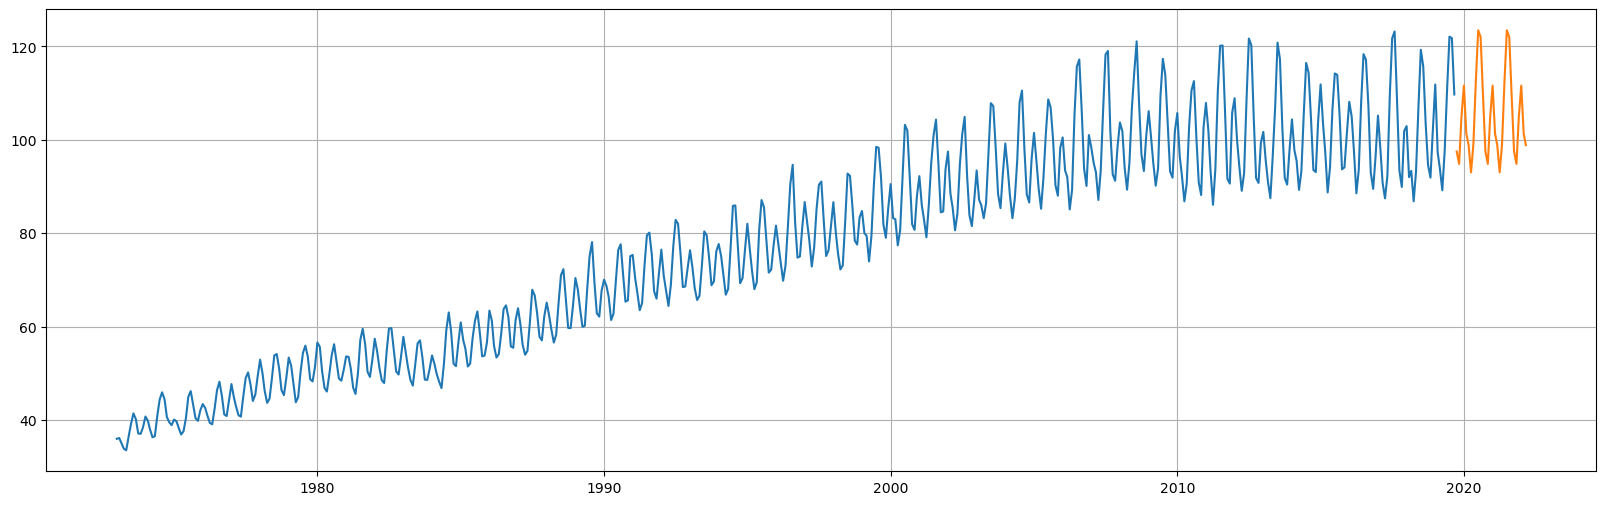

In [54]:
plt.figure(figsize = (20,6))
plt.plot(df,label = "Data given from 1973 to 2019")
plt.plot(forecast,label = "forecasted future consumption for 2020 to 22")
plt.grid()
plt.show()

In [55]:
#SARIMA MODEL

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [83]:
sarima_model = SARIMAX(df, order=(1, 1,1 ), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [84]:
forecast = sarima_fit.forecast(steps=30)
forecast

2019-10-01     97.040945
2019-11-01     93.994580
2019-12-01    103.302704
2020-01-01    109.735016
2020-02-01     99.555645
2020-03-01     95.672663
2020-04-01     89.961320
2020-05-01     96.434413
2020-06-01    110.387780
2020-07-01    121.539388
2020-08-01    120.587584
2020-09-01    108.421153
2020-10-01     96.348874
2020-11-01     93.783508
2020-12-01    103.358731
2021-01-01    109.805842
2021-02-01     99.963668
2021-03-01     96.132434
2021-04-01     90.411758
2021-05-01     96.814488
2021-06-01    110.819327
2021-07-01    121.976694
2021-08-01    120.999499
2021-09-01    108.831504
2021-10-01     96.792419
2021-11-01     94.252976
2021-12-01    103.842688
2022-01-01    110.291125
2022-02-01    100.466420
2022-03-01     96.638031
Freq: MS, Name: predicted_mean, dtype: float64

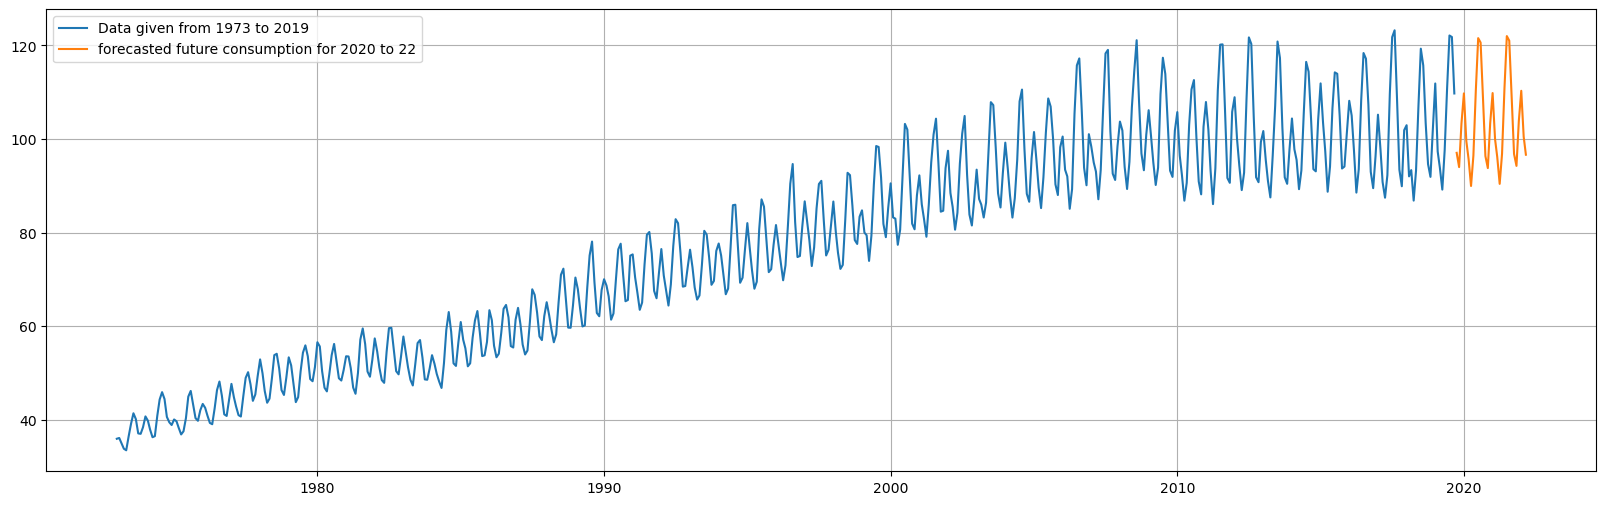

In [85]:
plt.figure(figsize = (20,6))
plt.plot(df,label = "Data given from 1973 to 2019")
plt.plot(forecast,label = "forecasted future consumption for 2020 to 22")
plt.grid()
plt.legend()
plt.show()